In [50]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [52]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [53]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [54]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# scaler = StandardScaler()


# Initialize StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.iloc[:, 1:])

from pprint import pprint
pprint(scaled_data)

array([[ 4.93193071e-01,  7.72200433e-01,  2.35459633e-01,
        -6.74950963e-02, -3.55953481e-01, -2.51636882e-01],
       [ 9.34445040e-01,  5.58692121e-01, -5.43409317e-02,
        -2.73482725e-01, -1.15759474e-01, -1.99352110e-01],
       [-7.06336853e-01, -2.16804207e-02, -6.10301536e-02,
         8.00452481e-03, -5.50246924e-01, -2.82060506e-01],
       [-8.10928066e-01,  2.49457974e-01, -5.03879651e-02,
        -3.73164019e-01, -4.58258816e-01, -2.95546142e-01],
       [ 2.00095907e+00,  1.76061001e+00,  5.45842065e-01,
        -2.91202870e-01, -4.99847761e-01, -2.70316950e-01],
       [ 1.32729453e+00,  8.00214184e-01, -5.71478992e-02,
         7.78653106e-01, -1.88231917e-01, -2.25532605e-01],
       [ 2.57225091e+00,  1.10164693e+00, -4.90495415e-01,
        -9.31954023e-01,  3.87758986e-01, -1.82843995e-02],
       [ 1.50800146e+00,  6.48885061e-01,  3.28959245e-01,
        -4.86348899e-01,  6.50796233e-02, -1.55428416e-01],
       [ 3.34296562e-01,  8.58519864e-01, -1.264

In [55]:
# Select only the numerical columns for scaling
numerical_data = df_market_data.drop(columns=["coin_id"],  errors='ignore')  # Drop the 'coin_id' column
pprint(numerical_data)

# Scale the numerical data
scaled_data = scaler.fit_transform(numerical_data)

# Create DataFrame with scaled numerical data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_data.columns, index=df_market_data.index,  errors='ignore')

# Include 'coin_id' column in the DataFrame
df_scaled['coin_id'] = df_market_data['coin_id']

# Set 'coin_id' as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
print(df_scaled.head(10))


                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                     7.60278   
ethereum                                  0.22392                    10.38134   
tether                                   -0.21173                     0.04935   
ripple                                   -0.37819                    -0.60926   
bitcoin-cash                              2.90585                    17.09717   
binancecoin                               2.10423                    12.85511   
chainlink                                -0.23935                    20.69459   
cardano                                   0.00322                    13.99302   
litecoin                                 -0.06341                     6.60221   
bitcoin-cash-sv                           0.92530                     3.29641   
crypto-com-chain            

TypeError: DataFrame.__init__() got an unexpected keyword argument 'errors'

---

### Find the Best Value for k Using the Original Data.

In [68]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [69]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Now execute your KMeans code
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    #    Explicitly set n_init to suppress the warning
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

    # 2. Fit the model to the data using `df_scaled`
    kmeans_model.fit(df_scaled)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [70]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

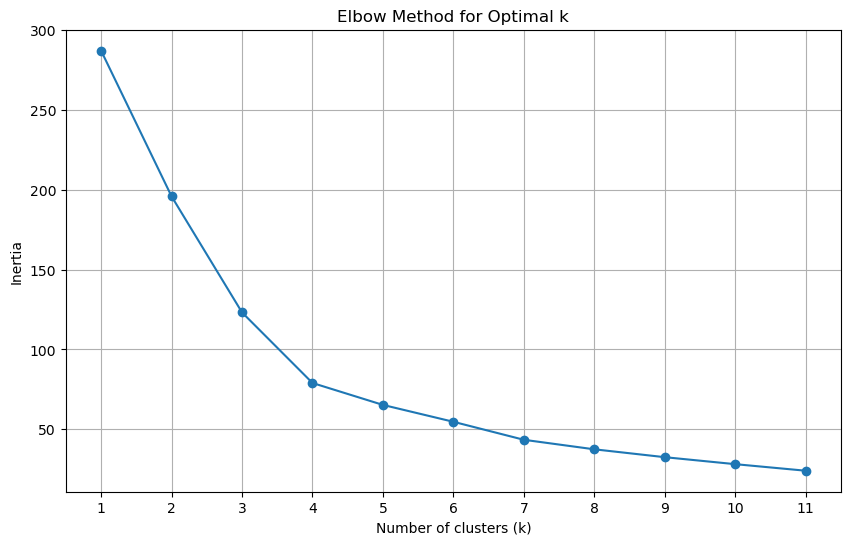

In [71]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4 is the best value for 'k'

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [72]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [73]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [74]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print("Cluster values:", clusters)

Cluster values: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [75]:
# Create a copy of the DataFrame
df_clustered = df_market_data.copy()

In [76]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = clusters

# Display sample data
print(df_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [77]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    width=800,
    height=500
)

# Show the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [90]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [91]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca_model.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
print("First five rows of PCA data:")
print(pca_data[:5])

First five rows of PCA data:
[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [92]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print("\nExplained variance of the three principal components:")
print(explained_variance)

# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)
print("\nTotal explained variance of the three principal components:", total_explained_variance)



Explained variance of the three principal components:
[0.3719856  0.34700813 0.17603793]

Total explained variance of the three principal components: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.8950316570309841

In [94]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Add 'coin_id' column only if it exists
if 'coin_id' in df_market_data.columns:
    # Copy the crypto names from the original data
    df_pca['coin_id'] = df_market_data['coin_id']
    # Set the coinid column as index
    df_pca.set_index('coin_id', inplace=True)

# Display sample data
print("\nSample data of the new DataFrame with PCA data:")
print(df_pca.head())


Sample data of the new DataFrame with PCA data:
       PCA1      PCA2      PCA3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [101]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [102]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_pca`
    kmeans_model_pca.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model_pca.inertia_)


C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [103]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

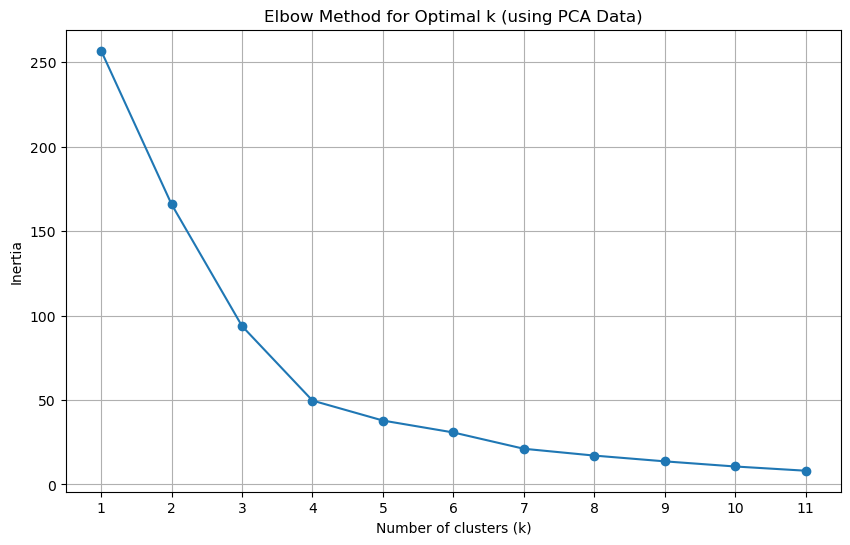

In [104]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method for Optimal k (using PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [105]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4

In [106]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca)

C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

In [107]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_model_pca.predict(df_pca)

# Print the resulting array of cluster values.
print("Cluster values (PCA data):", clusters_pca)

Cluster values (PCA data): [ 4  4  9  9  1  4 10  4  4  6  0  9  9  1  6  6  0  6  4  9  0  4  9  9
  5  9  6  0  4  8  6  6  2  6  7  5  3  0  6  9  9]


In [108]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_pca['Cluster'] = clusters_pca

# Display sample data
print(df_clustered_pca.head())

       PCA1      PCA2      PCA3  Cluster
0 -0.600667  0.842760  0.461595        4
1 -0.458261  0.458466  0.952877        4
2 -0.433070 -0.168126 -0.641752        9
3 -0.471835 -0.222660 -0.479053        9
4 -1.157800  2.041209  1.859715        1


In [109]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_clustered_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA Data)",
    width=800,
    height=500
)

# Show the scatter plot
scatter_plot_pca

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [110]:
# Composite plot to contrast the Elbow curves

import holoviews as hv

# Create a line plot for the Elbow curves
elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Method for Optimal k',
    xlabel='Number of clusters (k)',
    ylabel='Inertia',
    xlim=(1, 11),
    width=500,
    height=400
)

# Create a scatter plot to visualize the clusters using the original data
scatter_original = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (Original Data)",
    width=800,
    height=500
)

# Create a scatter plot to visualize the clusters using the PCA data
scatter_pca = df_clustered_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA Data)",
    width=800,
    height=500
)


In [111]:
# Composite plot to contrast the clusters
composite_elbow = elbow_plot.opts(shared_axes=False)

# Composite plot to contrast the clusters
composite_clusters = (scatter_original + scatter_pca).cols(2)

# Visualize and compare the results
composite_elbow + composite_clusters

:Layout
   .Curve.I      :Curve   [k]   (inertia)
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** PCA reduces the dimensionality of the data by transforming it into a lower-dimensional space while retaining as much variance as possible. This reduction in dimensions can lead to simpler and more interpretable models.